In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


columns = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"
]

data = pd.read_csv('adult.data.csv', names=columns, skipinitialspace=True)

data.replace('?', np.nan, inplace=True)

data.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
gender_count = data['sex'].value_counts()

print(f"Total number of {gender_count.index[0]} in this dataset - {gender_count.iloc[0]} persons, {gender_count.index[1]} - {gender_count.iloc[1]} persons.")

Total number of Male in this dataset - 21790 persons, Female - 10771 persons.


In [3]:
female_data = data[data['sex'] == 'Female']

print(f"The average female age is {round(female_data['age'].mean())}")

The average female age is 37


In [4]:
state_repr = data['native-country'].value_counts().loc['Germany']

perc_amount = round(((state_repr / len(data)) * 100), 2)


print(f"The number of German citizens is {state_repr}, which is {perc_amount} % of the total number of citizens represented in this dataset.")

The number of German citizens is 137, which is 0.42 % of the total number of citizens represented in this dataset.


In [5]:
high_salary = data[data['salary'] == '>50K']

low_salary = data[data['salary'] == '<=50K']


high_mean_age = round(high_salary['age'].mean())

stand_dev_high = round(high_salary['age'].std(), 2)


low_mean_age = round(low_salary['age'].mean())

stand_dev_low = round(low_salary['age'].std(), 2)


print(f"The mean age of earners with income higher than 50K is {high_mean_age}, the mean square deviation in this case will be equal to {stand_dev_high}")

print(f"The mean age of earners with income lower or equal 50K is {low_mean_age}, the mean square deviation in this case will be equal to {stand_dev_low}")

The mean age of earners with income higher than 50K is 44, the mean square deviation in this case will be equal to 10.52
The mean age of earners with income lower or equal 50K is 37, the mean square deviation in this case will be equal to 14.02


In [6]:
total_educ_high_sal = high_salary['education'].value_counts()
high_educ_high_sal = total_educ_high_sal[['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']]


if sum(total_educ_high_sal) == sum(high_educ_high_sal):
    print(f"Total amount of people with >50K income is {sum(total_educ_high_sal)}, among them amount of people with higher education is {sum(high_educ_high_sal)}. So, people who earn an income of more than 50K have higher education.")

else:
    print(f"Total amount of people with >50K income is {sum(total_educ_high_sal)}, among them amount of people with higher education is {sum(high_educ_high_sal)}. So, people who earn more than 50K don't always have higher education.")

Total amount of people with >50K income is 7841, among them amount of people with higher education is 4535. So, people who earn more than 50K don't always have higher education.


In [7]:
age_statistics = data.groupby(['race', 'sex'])['age'].describe()

max_male_age = round(age_statistics.loc[('Amer-Indian-Eskimo', 'Male'), 'max'])


print(age_statistics.head())
print()
print()
print(f"Maximum male age of Amer-Indian-Eskimo race is {max_male_age} years.")

                            count       mean        std   min   25%   50%  \
race               sex                                                      
Amer-Indian-Eskimo Female   119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male     192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female   346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male     693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female  1555.0  37.854019  12.637197  17.0  28.0  37.0   

                             75%   max  
race               sex                  
Amer-Indian-Eskimo Female  46.00  80.0  
                   Male    45.00  82.0  
Asian-Pac-Islander Female  43.75  75.0  
                   Male    46.00  90.0  
Black              Female  46.00  90.0  


Maximum male age of Amer-Indian-Eskimo race is 82 years.


In [8]:
mylist = ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']

male_high_income_marr = data.loc[(data['sex'] == 'Male') & (data['marital-status'].isin(mylist))]

married_total_counts = male_high_income_marr['salary'].value_counts()

married_high_salary = married_total_counts.iloc[married_total_counts.index.get_loc('>50K')]

perc_marr_high_salary = round((married_high_salary * 100) / sum(married_total_counts))


male_high_income_not_marr = data.loc[(data['sex'] == 'Male') & (~data['marital-status'].isin(mylist))]

not_marr_total_counts = male_high_income_not_marr['salary'].value_counts()

not_marr_high_salary = not_marr_total_counts.iloc[not_marr_total_counts.index.get_loc('>50K')]

perc_not_marr_high_salary = round((not_marr_high_salary * 100) / sum(not_marr_total_counts))


print(f"The total percent of men with income above 50K among those who married - {perc_marr_high_salary} %, among those who is not married - {perc_not_marr_high_salary} %.")

The total percent of men with income above 50K among those who married - 44 %, among those who is not married - 8 %.


In [9]:
max_hours_value = data['hours-per-week'].max()

max_hours_data = data[data['hours-per-week'] == max_hours_value]

high_income_hours = max_hours_data[max_hours_data['salary'] == '>50K']

perc_result = round((len(high_income_hours) / len(max_hours_data)) * 100)


print(f"Maximum number of hours per week - {max_hours_value}, total number of people who work that amount of time - {len(max_hours_data)}, and the percentage of high-income people among them, which is equal to {perc_result} %.")

Maximum number of hours per week - 99, total number of people who work that amount of time - 85, and the percentage of high-income people among them, which is equal to 29 %.


In [10]:
hours_statistics = data.groupby(['native-country', 'salary'])['hours-per-week'].describe()

filtered = hours_statistics.loc[hours_statistics.index.get_level_values('native-country') != '?']

filtered = round(filtered[['mean']])

filtered = filtered.reset_index()


print(hours_statistics.head())
print()
print()
print(filtered.head())


                       count       mean        std   min    25%   50%   75%  \
native-country salary                                                         
Cambodia       <=50K    12.0  41.416667   3.088346  40.0  40.00  40.0  40.5   
               >50K      7.0  40.000000   0.000000  40.0  40.00  40.0  40.0   
Canada         <=50K    82.0  37.914634  13.012056   8.0  32.75  40.0  40.0   
               >50K     39.0  45.641026  12.066673  20.0  40.00  45.0  51.0   
China          <=50K    55.0  37.381818  11.439844   1.0  36.00  40.0  40.0   

                        max  
native-country salary        
Cambodia       <=50K   50.0  
               >50K    40.0  
Canada         <=50K   70.0  
               >50K    72.0  
China          <=50K   60.0  


  native-country salary  mean
0       Cambodia  <=50K  41.0
1       Cambodia   >50K  40.0
2         Canada  <=50K  38.0
3         Canada   >50K  46.0
4          China  <=50K  37.0


<Axes: xlabel='age', ylabel='hours-per-week'>

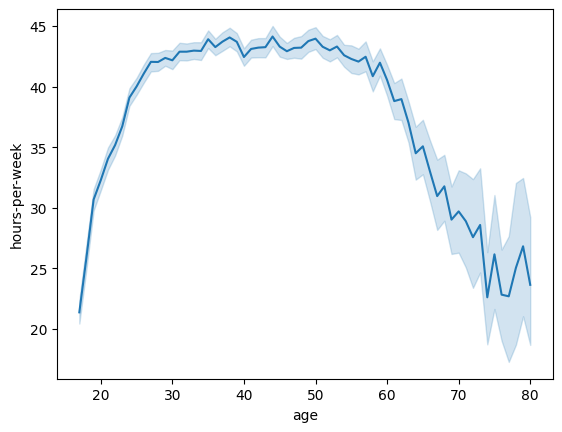

In [11]:
# По графику видно что наибольшее количество часов в неделю имеют люди в возрасте приблизительно от 30 до 60 лет. После приблизительно 20 лет рост
# трудовых часов увеличивается, после 60 лет идёт на спад.


sns.lineplot(
    x="age", 
    y="hours-per-week",
    data=data[data['age'] <= 80])

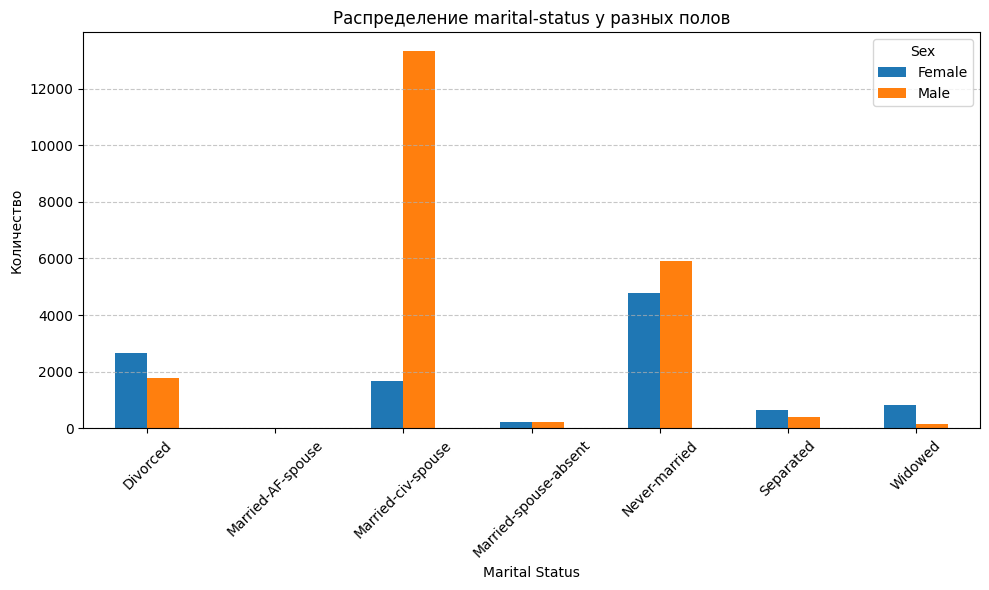

In [12]:
# По графику видно что распределение marital-status у людей разного пола в основном имеет разный характер. Лишь в категориях Married-spouse-absent
# и Separated распределение имеет схожую тенденцию.


marital_sex_counts = pd.crosstab(data['marital-status'], data['sex'])

marital_sex_counts.plot(kind='bar', figsize=(10, 6))

plt.title('Распределение marital-status у разных полов')
plt.xlabel('Marital Status')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

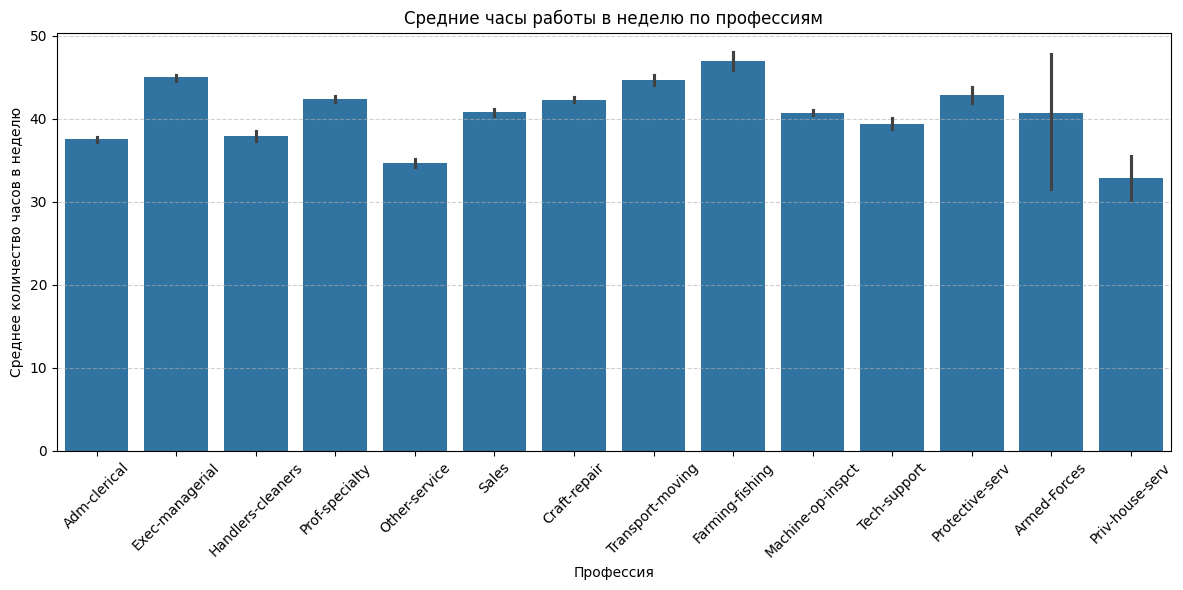

In [13]:
# Исходя из полученного графика, можно заметить что профессии, связанные с фермерством, рыбной ловлей, менеджментом, сферой транспортной логистики
# требуют наибольшее количество трудовых часов в неделю. Сферы, связанные с частными домашними услугами, обладают наименьшим количеством трудовых
# часов из представленных профессий.  


# data_cleaned = data[data['occupation'] != '?']


plt.figure(figsize=(12, 6))

sns.barplot(data=data, x='occupation', y='hours-per-week', estimator='mean')

plt.title('Средние часы работы в неделю по профессиям')
plt.xlabel('Профессия')
plt.ylabel('Среднее количество часов в неделю')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()
